In [1]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 颜色
color = sns.color_palette()
# 数据print精度
pd.set_option('precision',3) 

# 介绍
这个notebook分析了红酒的通用数据集`data/winequality-red.csv`。这个数据集有1599个样本，11个红酒的理化性质，以及红酒的品质（评分从0到10）。这里主要目的在于展示进行数据分析的常见 python 包的调用，以及数据可视化。主要内容分为：单变量，双变量，和多变量分析。

`data/winequality.names.txt`补充了数据集的一些信息，主要内容有：
- 类别不均匀
- 离群点检测算法可以用来检测少数优质的或劣质的葡萄酒
- 有几种特征是相关的，建议进行特征选择

## 数据集基本信息


| No   | 属性                             | 数据类型 | 字段描述               |
| :--- | :------------------------------- | :------- | :--------------------- |
| 1    | fixed acidity                    | Numeric  | 非挥发性酸             |
| 2    | volatile acidity                 | Numeric  | 挥发性酸               |
| 3    | citric acid                      | Numeric  | 柠檬酸                 |
| 4    | residual sugar                   | Numeric  | 残糖                   |
| 5    | chlorides                        | Numeric  | 氯化物                 |
| 6    | free sulfur dioxide              | Numeric  | 游离二氧化硫           |
| 7    | total sulfur dioxide             | Numeric  | 总二氧化硫             |
| 8    | density                          | Numeric  | 密度                   |
| 9    | pH                               | Numeric  | 酸碱度                 |
| 10   | sulphates                        | Numeric  | 硫酸盐                 |
| 11   | alcohol                          | Numeric  | 酒精                   |
| 12   | quality (score between 0 and 10) | Numeric  | 葡萄酒质量（1-10之间） |

## 研究方向
可以从以下几个方面来探索葡萄酒质量数据：
- 葡萄酒质量的分布情况如何？
- 如何根据现有数据预测新的葡萄酒的质量？
- 是否所有理化特征都与葡萄酒的质量相关？

# 读取数据

In [2]:
df = pd.read_csv('data/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5


查看数据集基本信息

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


从上面分析可看出
- 红酒数据集的前11列是特征/属性（有11个），标签是红酒的品质 quality（离散值，位于0-10）。
- 特征无缺失值，且数据类型均为float64

# 单变量分析

查看整体的统计信息

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [5]:
# 定义画布的风格 
# plt.style.available  # 另一种自带风格
plt.style.use('ggplot')  

我们可以**绘制各单边量的箱线图，查看它们的分布情况**


Figure 1: Univariate Boxplots


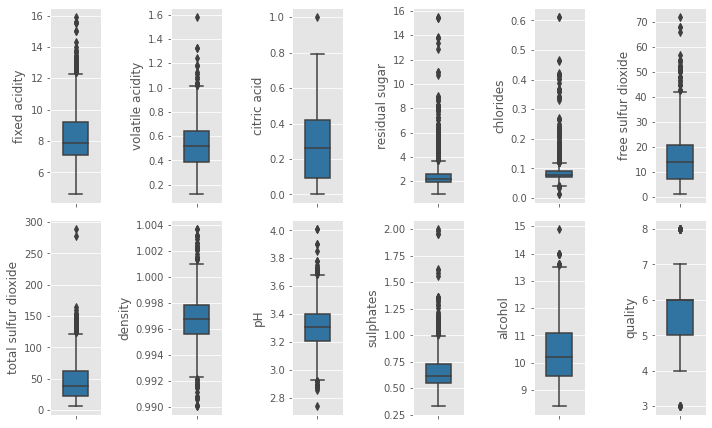

In [6]:
colnm = df.columns.tolist() # 获取各变量的名称
fig = plt.figure(figsize = (10, 6))  # 设置画布大小

# 绘制各变量的箱线图
for i in range(12):
    plt.subplot(2, 6, i+1)  # 准备2*6的子画布 刚好绘制12个单变量的箱型图
    sns.boxplot(df[colnm[i]], orient="v", width = 0.5, color = color[0])  # 绘制各单变量（Dataframe各列）的箱型图
    plt.ylabel(colnm[i],fontsize = 12)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.9)

plt.tight_layout()
print('\nFigure 1: Univariate Boxplots')

**绘制各变量的分布直方图**


Figure 2: Univariate Histograms


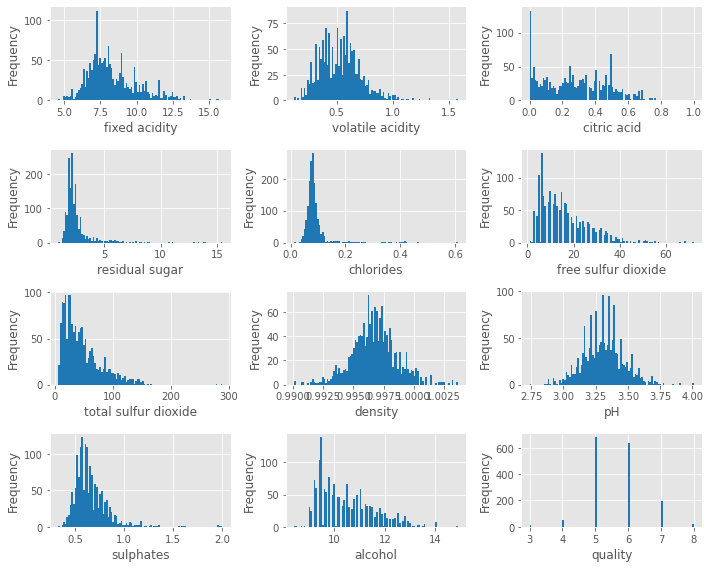

In [7]:
colnm = df.columns.tolist()
plt.figure(figsize = (10, 8))

for i in range(12):
    plt.subplot(4,3,i+1)
    df[colnm[i]].hist(bins = 100, color = color[0])
    plt.xlabel(colnm[i],fontsize = 12)
    plt.ylabel('Frequency')
plt.tight_layout()
print('\nFigure 2: Univariate Histograms')

## 红酒品质

In [8]:
df["quality"].value_counts()[[5,6]].sum()/1599  # 品质为5或6的红酒数占比

0.8248905565978737

根据直方图和计算可知：
- 数据集的目的是研究红酒品质和理化性质之间的关系，品质的评价范围是0-10
- 该数据集中红酒的品质的范围是3-8，且主要集中在5-6（占比约为82.5%）

## 酸度
数据集有7个酸度相关的特征：
1. fixed acidity
2. volatile acidity
3. citric acid
4. free sulfur dioxide
5. total sulfur dioxide
6. sulphates
7. pH

**分析**：
- 根据化学酸碱度知识可知，前六个特征与 pH 有关，前三个特征是酸，直接产生 H 离子，4-6个特征是二氧化硫和盐，间接产生 H 离子。
- **pH值主要是与fixed acidity有关**（这个结论实际上我不知道怎么验证，感觉涉及化学专业内容，因此这里直接借鉴了过来）

由于 pH 是氢离子浓度的以10为底的对数值，因此为探究前六个特征与 pH 之间的关系，我们绘制前六个特征的以10为底的对数（对特征取对数）的直方图。


Figure 3: Acidity Features in log10 Scale


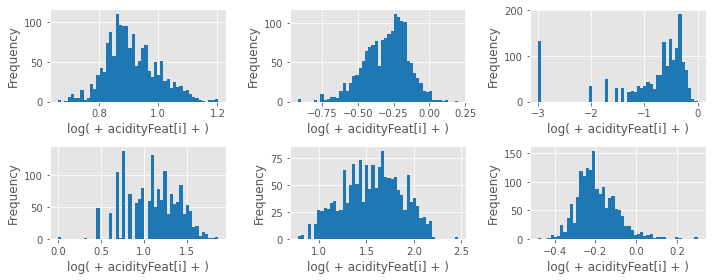

In [9]:
acidityFeat = ['fixed acidity', 'volatile acidity', 'citric acid',  # 酸性相关的六个特征
               'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

plt.figure(figsize = (10, 4))

for i in range(6):
    ax = plt.subplot(2,3,i+1)
    v = np.log10(np.clip(df[acidityFeat[i]].values, a_min = 0.001, a_max = None))  # 取对数后绘制直方图
    plt.hist(v, bins = 50, color = color[0])
    plt.xlabel('log( + acidityFeat[i] + )',fontsize = 12)
    plt.ylabel('Frequency')
             
plt.tight_layout()
print('\nFigure 3: Acidity Features in log10 Scale')

**绘制关于 fixed acidity、volatile acidity、citric acid 的对数坐标直方图，比较它们的数量级**

Figure 4


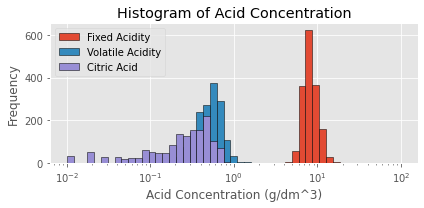

In [10]:
plt.figure(figsize=(6,3))

bins = 10**(np.linspace(-2, 2))  # x轴
plt.hist(df['fixed acidity'], bins = bins, edgecolor = 'k', label = 'Fixed Acidity')
plt.hist(df['volatile acidity'], bins = bins, edgecolor = 'k', label = 'Volatile Acidity')
plt.hist(df['citric acid'], bins = bins, edgecolor = 'k', alpha = 1, label = 'Citric Acid')
plt.xscale('log')  # 设置对数尺度的x轴
plt.xlabel('Acid Concentration (g/dm^3)')
plt.ylabel('Frequency')
plt.title('Histogram of Acid Concentration')
plt.legend()
plt.tight_layout()

print('Figure 4')

结论：**Fixed Acidity 是 Volatile Acidity 和 Citric Acid 数量级的1~2倍**

将 Fixed Acidity、Volatile Acidity 和 Citric Acid 加起来，定义一个名为总酸度（total acid）的特征：

In [11]:
# 计算总酸度
df['total acid'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']

**绘制总酸度的直方图**

Figure 5: Total Acid Histogram


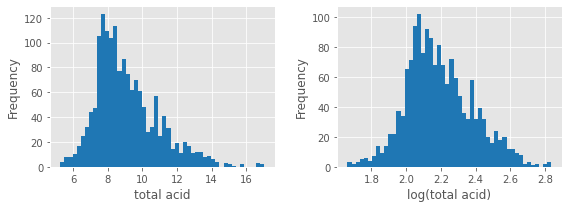

In [12]:
plt.figure(figsize = (8,3))

# 总酸度的直方图
plt.subplot(121)  
plt.hist(df['total acid'], bins = 50, color = color[0])
plt.xlabel('total acid')
plt.ylabel('Frequency')

# 总酸度取对数后的直方图
plt.subplot(122)  
plt.hist(np.log(df['total acid']), bins = 50 , color = color[0])
plt.xlabel('log(total acid)')
plt.ylabel('Frequency')
plt.tight_layout()

print("Figure 5: Total Acid Histogram")

## 甜度
知识：红酒的甜度与特征 residual sugar 有关，干红（<=4 g/L), 半干（4-12 g/L）,半甜（12-45 g/L），和甜（>45 g/L)。

**下面先将不同 residual sugar 的样本映射到相应甜度（使用到了 Pandas 中 category 数据类型的知识，要补充下了），然后绘制直方图，查看分布**

In [13]:
df['sweetness'] = pd.cut(df['residual sugar'], bins = [0, 4, 12, 45, np.inf], labels=["dry", "medium dry", "semi-sweet", "sweet"])  
df['sweetness'].value_counts()

dry           1474
medium dry     117
semi-sweet       8
sweet            0
Name: sweetness, dtype: int64

Figure 6: Sweetness


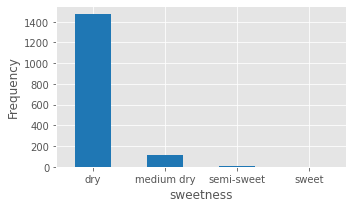

In [14]:
plt.figure(figsize = (5,3))

# plt.bar(df['sweetness'].value_counts(), color = color[0])
df['sweetness'].value_counts().plot(kind='bar', color = color[0])
plt.xticks(rotation=0)
plt.xlabel('sweetness', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.tight_layout()
print("Figure 6: Sweetness")

结论：从图像可以得知，**该数据集的红酒的甜度基本都是干红型。**

# 双变量分析
在研究之前先来看看已有的变量有哪些：

In [15]:
df.columns, len(df.columns)

(Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol', 'quality', 'total acid', 'sweetness'],
       dtype='object'),
 14)

可以看到 quality 在 total acid 的前面，为了之后分析方便，我们先交换这两列（交换Dataframe的两列，这里采用的reindex函数，还有其他的方案）：

In [25]:
new_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
               'pH', 'sulphates', 'alcohol', 'total acid', 'quality', 'sweetness']
df = df.reindex(new_columns, axis=1)

In [30]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'total acid', 'quality', 'sweetness'],
      dtype='object')

## 红酒品质和理化特征的关系

**绘制不同品质红酒各理化特征的箱形图**


Figure 7: Physicochemical Properties and Wine Quality by Boxplot


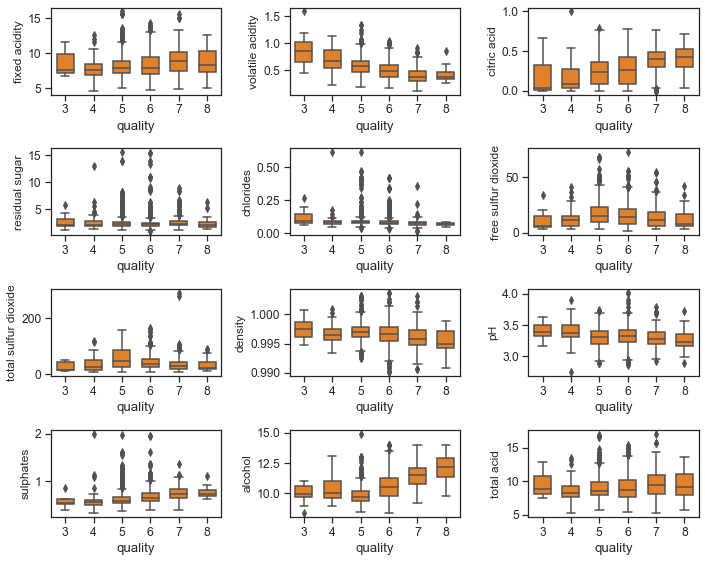

In [31]:
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.1)

columns = df.columns.tolist()[:12] 
plt.figure(figsize = (10, 8))

for i in range(12):
    plt.subplot(4,3,i+1)
    sns.boxplot(x ='quality', y = columns[i], data = df, color = color[1], width = 0.6)    
    plt.ylabel(colnm[i],fontsize = 12)
plt.tight_layout()
print("\nFigure 7: Physicochemical Properties and Wine Quality by Boxplot")

结论：
1. 品质好的酒有更高的柠檬酸，硫酸盐，和酒精度数（至于相关性有多大，见下面分析）
2. 品质好的酒有较低的挥发性酸类，密度，和pH

**根据各变量的相关系数矩阵绘制热力图，探究各变量两两的相关性**


Figure 8: Pairwise Correlation Plot


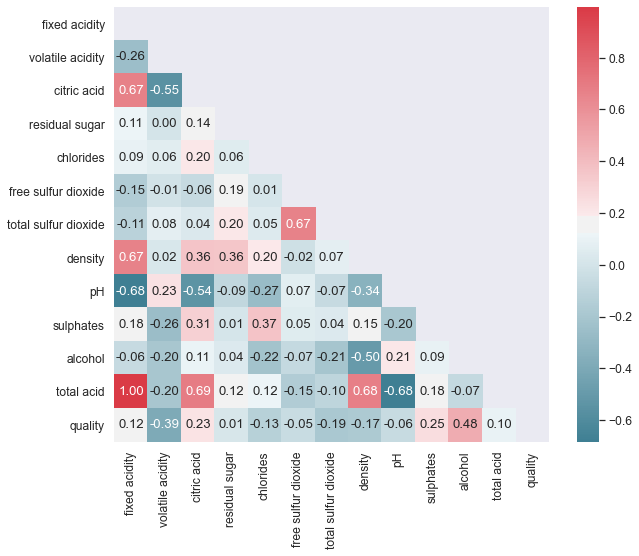

In [34]:
sns.set_style("dark")

plt.figure(figsize = (10,8))
colnms = df.columns.tolist()[:13]
mcorr = df[colnm].corr()
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
print("\nFigure 8: Pairwise Correlation Plot")    

结论：
1. 酒精度数与红酒质量关系最大（corr=0.48）
2. 残留糖分（corr=0.01）、二氧化硫（corr=-0.05）似乎对酒的品质影响不大

## 密度和酒精浓度的关系
从前面的热力图可以得知，密度和酒精浓度是相关的（corr=-0.5）。下面绘制散点图，然后进行线性拟合。

Figure 9: Density vs Alcohol


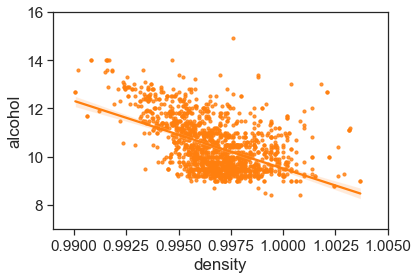

In [37]:
# style
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.4)

# plot figure
plt.figure(figsize = (6,4))
sns.regplot(x='density', y = 'alcohol', data = df, scatter_kws = {'s':10}, color = color[1])
plt.xlim(0.989, 1.005)
plt.ylim(7,16)
print('Figure 9: Density vs Alcohol')

结论：酒精浓度和密度是负相关的，但并不是线性关系。

## 酸性物质含量和pH的关系
这里想要探究和酸相关变量（挥发性、非挥发性、硫酸盐等）与pH的关系，分别绘制散点图，然后进行线性拟合。

注：总酸性（total acid）这个属性主要受非挥发性的影响，在研究与pH的关系时没有参考意义。

Figure 10: pH vs acid


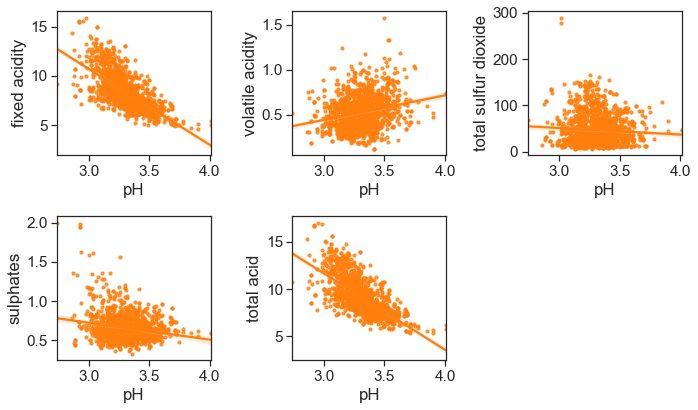

In [40]:
acidity_related = ['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 
                   'sulphates', 'total acid']

plt.figure(figsize = (10,6))

for i in range(5):
    plt.subplot(2,3,i+1)
    sns.regplot(x='pH', y = acidity_related[i], data = df, scatter_kws = {'s':10}, color = color[1])
plt.tight_layout()
print("Figure 10: pH vs acid")

**疑问**：这里遇到一个目前我没想明白的疑问，就是为什么挥发性酸和pH是正相关？直觉上来说，挥发性酸变多，酒中的氢离子浓度也变多，pH应该变小才对。

猜测：有[资料显示](https://www.atago.net/zh_tw/databook-acidity_wine.php)，pH越小，释放的酸味越大，如果将这里的酸味理解成是挥发性酸的气味，那么就是说pH越小，挥发的酸也就越多，酒中的挥发性酸就越少。

# 多变量分析
从热力图可知，与品质相关性最高的三个特征是酒精浓度，挥发性酸度，和柠檬酸。

## 酒精浓度，挥发性酸与红酒品质的关系

我们**绘制酒精浓度、挥发性酸关于红酒品质的散点图**，探究它们的关系

D:\Anaconda\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Figure 11-1: Scatter Plots of Alcohol, Volatile Acid and Quality


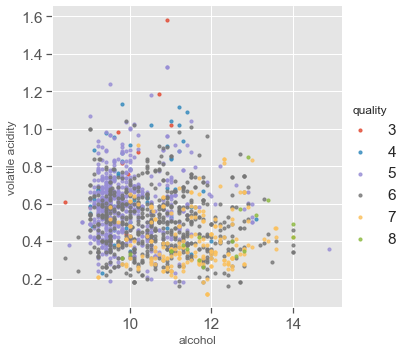

In [41]:
plt.style.use('ggplot')

sns.lmplot(x = 'alcohol', y = 'volatile acidity', hue = 'quality', 
           data = df, fit_reg = False, scatter_kws={'s':10}, size = 5)
print("Figure 11-1: Scatter Plots of Alcohol, Volatile Acid and Quality")

Figure 11-2: Scatter Plots of Alcohol, Volatile Acid and Quality


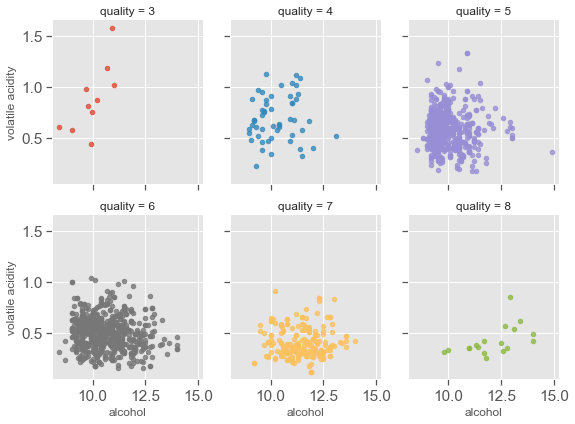

In [42]:
sns.lmplot(x = 'alcohol', y = 'volatile acidity', col='quality', hue = 'quality', 
           data = df,fit_reg = False, size = 3,  aspect = 0.9, col_wrap=3,
           scatter_kws={'s':20})
print("Figure 11-2: Scatter Plots of Alcohol, Volatile Acid and Quality")

结论：从图 11-2 可以明显看出，在红酒质量较高（7、8）或较低时（3、4）时，酒精浓度越大（小）、挥发性酸越少（多）、质量越好（差）。

# 总结
1. 红酒的品质主要与酒精浓度，挥发性酸，和柠檬酸有关
2. 我们根据`1`中提到的三个特征，对于品质优于7，或者劣于4的酒，。但是品质为5，6的酒很难线性区分。